<a href="https://colab.research.google.com/github/chrisjason0505/REAL-ESTATE-PREDICTIONS-/blob/main/real_estate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Price Prediction using Multiple Linear Regression
In this notebook, we'll analyze real estate data and build a linear regression model to predict house prices based on various features.
In this project we work with a dataset [available on Kaggle](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction).

**📌 Main Aim of The Project:**

To predict the house price (Y house price of unit area) using various independent features like number of bedrooms, distance to MRT station, number of convenience stores, etc., so you can make data-driven real estate investment or pricing decisions.



**What is Linear Regression?**


It’s a method to model the relationship between a dependent variable (e.g., house price) and one or more independent variables (e.g., area, location, number of bedrooms) by fitting a linear equation.


*In terms of a layman:*

You can think of linear regression as the answer to the question “How can I use A to predict B?”, where A is some information that you have and B is some information that you want to know.

**MULTILINEAR REGRESSION?**

For this project we are using multilinear regression which involves the use of multiple independent variables as inputs as opposed to normal linear regression where we only take a single independent variable as input.

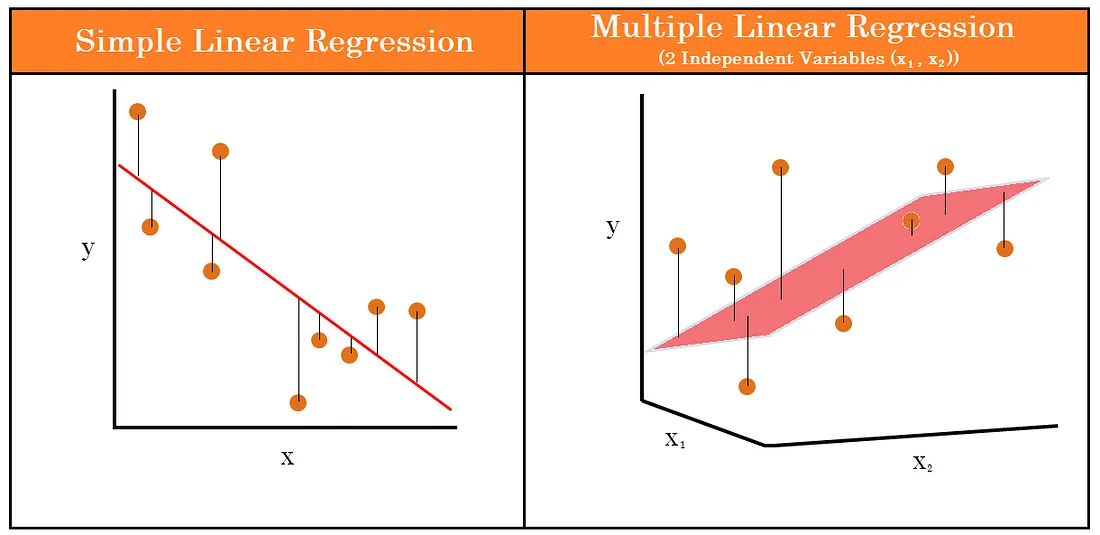

*The simple linear regression model can be represented graphically as a best-fit line between the data points, while the multiple linear regression model can be represented as a plane (in 2-dimensions) or a hyperplane (in higher dimensions).*

**EQUATION FOR MULTILINEAR REGRESSION**

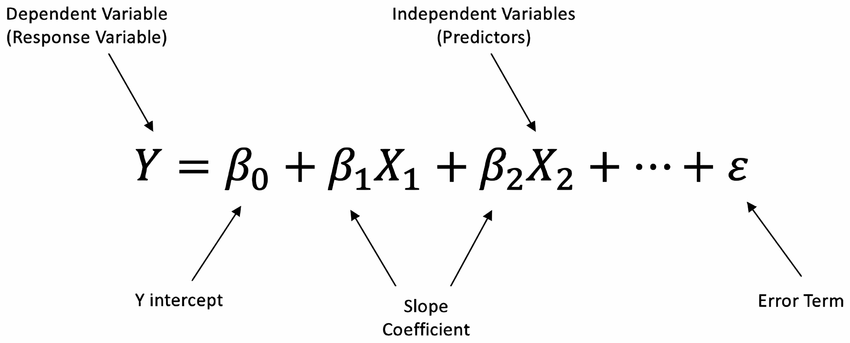

So in the case of our dataset:

Intercept: Predicted value of target value i.e predicted price

Slope Coeffecient: Coeffecient of predictive features since we are using multilinear regression for this dataset we will be getting a coeffecient for *each* predictive feature (house age,convenience stores etc.)




In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading and Initial Exploration(Overview)

In [30]:
# Load the dataset
df = pd.read_csv('Real estate.csv')

# Display first few rows and basic information
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  

In [52]:
df.columns

Index(['transaction_date', 'house_age', 'distance_to_mrt',
       'convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [31]:
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [32]:
print("Basic statistics:")
print(df.describe())

Basic statistics:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience sto

##  Data Preprocessing

In [33]:
# Drop the 'No' column as it's just an index
df = df.drop('No', axis=1)

# Rename columns for better readability
df.columns = ['transaction_date', 'house_age', 'distance_to_mrt', 'convenience_stores',
              'latitude', 'longitude', 'price_per_unit']

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
transaction_date      0
house_age             0
distance_to_mrt       0
convenience_stores    0
latitude              0
longitude             0
price_per_unit        0
dtype: int64


##  Exploratory Data Analysis

CORRELATION MATRIX FOR FEATURES

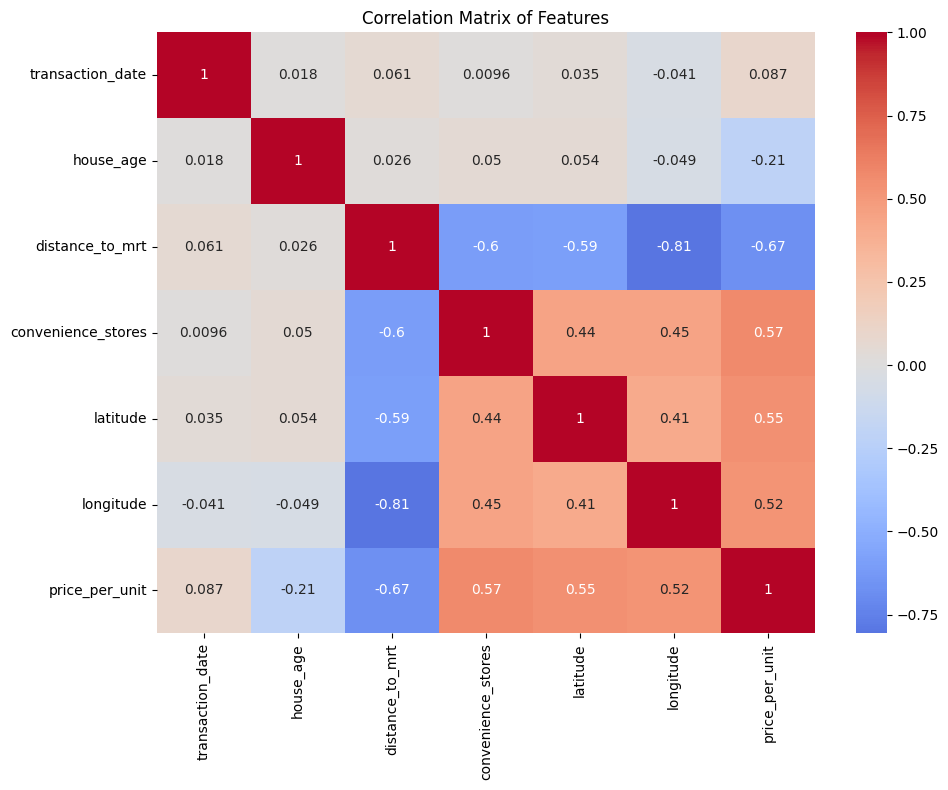

In [34]:

# Create correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()



HOUSE PRICES PER UNIT AREA DISTRIBUTION

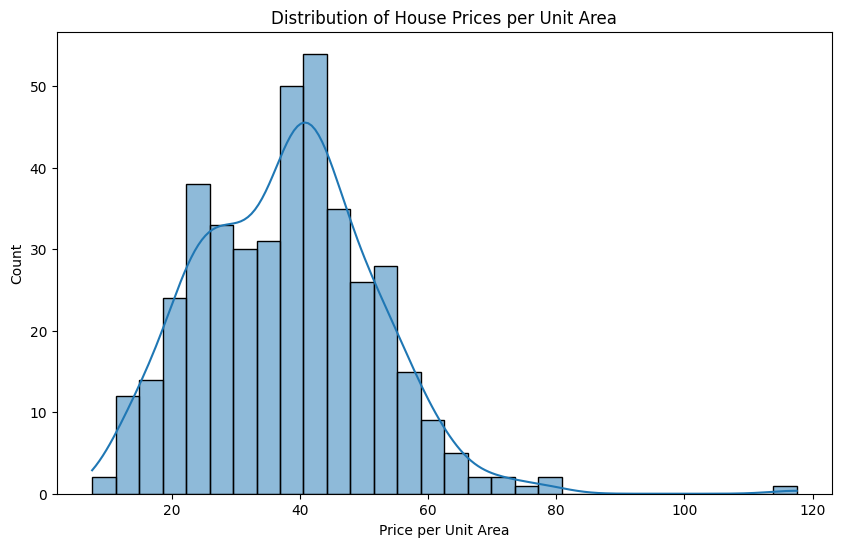

In [35]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_unit'], bins=30, kde=True)
plt.title('Distribution of House Prices per Unit Area')
plt.xlabel('Price per Unit Area')
plt.ylabel('Count')
plt.show()

SCATTER PLOTS FOR CORRELATION BETWEEN PRICE AND PREDICTIVE FEATURES

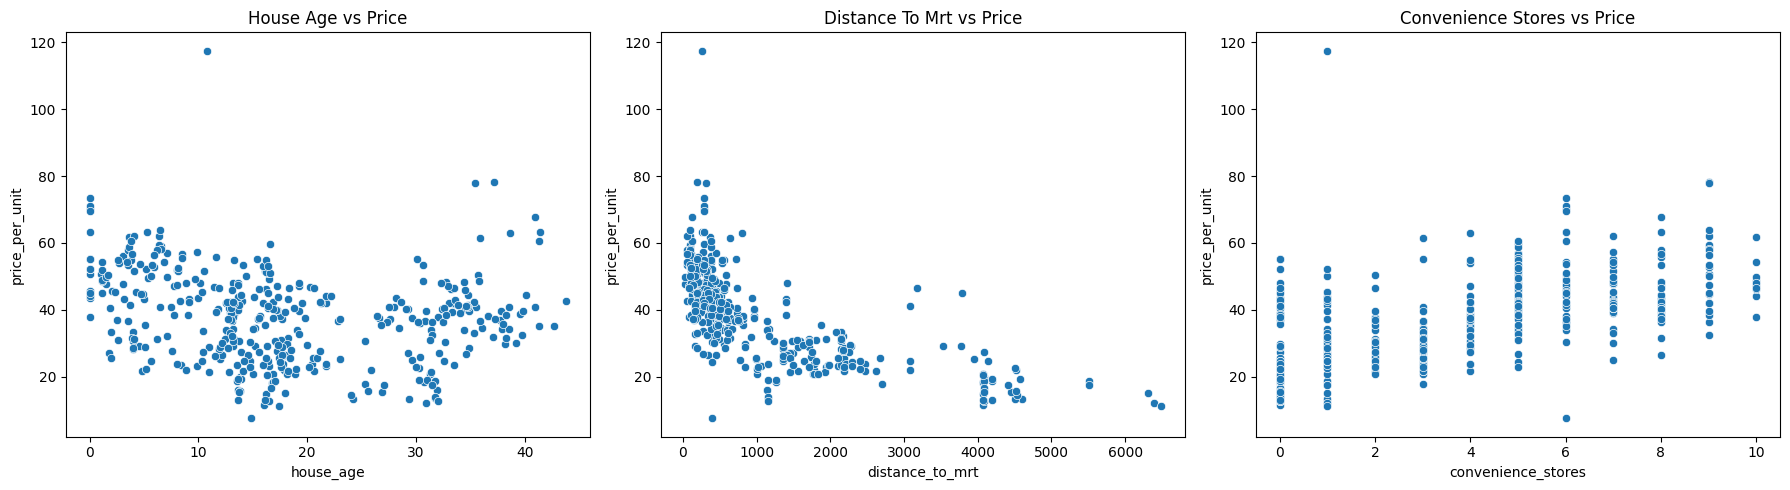

In [36]:
# Scatter plots of key features vs price
features = ['house_age', 'distance_to_mrt', 'convenience_stores']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='price_per_unit', ax=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Price')
plt.tight_layout()
plt.show()

##  Linear Regression Model

In [37]:
# Prepare features and target variable
X = df[['house_age', 'distance_to_mrt', 'convenience_stores', 'latitude', 'longitude']]
y = df['price_per_unit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Display feature coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coef_df)

Model Performance:
Mean Squared Error: 54.58
R-squared Score: 0.67

Feature Coefficients:
              Feature  Coefficient
0           house_age    -0.270593
1     distance_to_mrt    -0.004552
2  convenience_stores     1.105121
3            latitude   236.092831
4           longitude   -23.903694


**Whats the relevance of feature coefficients here??**

Every coefficient tells a story:

Magnitude: How strongly a feature impacts the price

Sign (+/-) → Whether it increases or decreases the price

Example: if β1 = 200, then a 1-unit increase in x1 increases price by 200 units

So here for example; convenience_stores has a coeffecient of 1.105ish so a 1 unit increase in convenience_stores would increase price by 1.105..

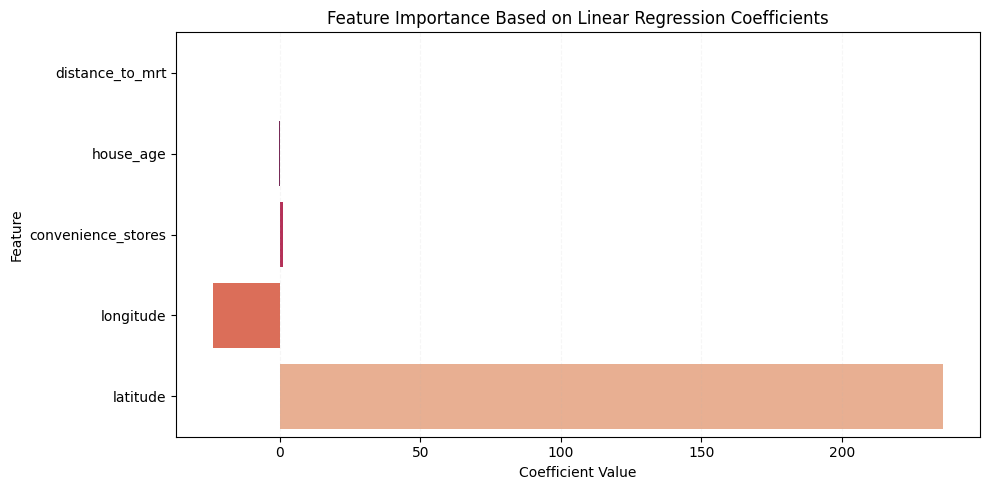

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume you already trained this:
# model = LinearRegression()
# model.fit(X_train, y_train)

# Create a dataframe of features and their coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sort by absolute value (optional for better visual clarity)
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coef', ascending=True)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_sorted, legend=False,palette="rocket",hue="Feature")
plt.title('Feature Importance Based on Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()


## Model Evaluation

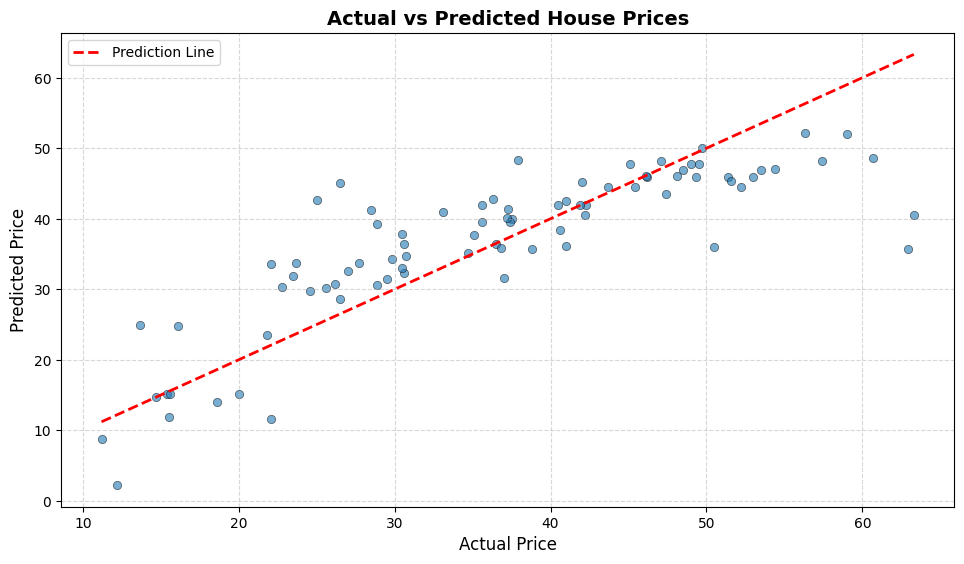

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', linewidth=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2, label='Prediction Line'
)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Actual vs Predicted House Prices', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(pad=2.0)
plt.show()




The scatter plot reveals that the model generally captures the upward trend in house prices — as actual prices rise, predicted values follow suit.

However, a clear pattern emerges: the model tends to overestimate prices for lower-valued homes and underestimate them for higher-valued ones.

This suggests that its linear assumptions may be too simplistic to fully capture the complexity of the data. With enhancements such as normalization or non-linear modeling, its accuracy could improve significantly.

As it stands, the model offers a reliable basis for exploratory analysis and initial data-driven decision-making in the context of real estate valuation.

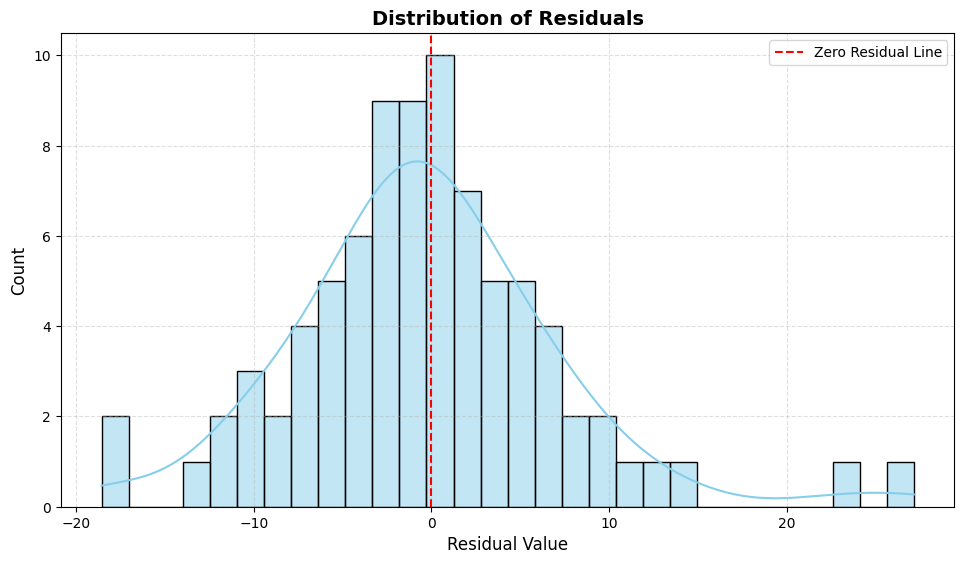

In [39]:
# Plot 2: Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, label='Zero Residual Line')
plt.title('Distribution of Residuals', fontsize=14, fontweight='bold')
plt.xlabel('Residual Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout(pad=2.0)
plt.show()

So ideal residual value (residual value=0) has the highest count which means our model is **very good** in predicting the real estate prices.

##**Summary**



✅ Performed data preprocessing and feature selection
Selected key predictors including house age, proximity to MRT stations, number of convenience stores, and geographic coordinates.

✅ Trained a multiple linear regression model
Utilized scikit-learn to fit the model and statsmodels for in-depth statistical analysis (R², p-values, confidence intervals).

✅ Evaluated model performance
Assessed model accuracy using Mean Squared Error (MSE) and R-squared, confirming a reasonable fit with visible trends.

✅ Visualized prediction accuracy
Plotted actual vs. predicted prices to inspect model behavior; identified underestimation at high-price ranges and overestimation at low-price ranges.

✅ Analyzed feature coefficients
Created dynamic bar plots to interpret the effect of each feature on price, aiding explainability and decision-making.

✅ Proposed model improvements
Highlighted potential benefits of incorporating non-linear models or regularization for better generalization and prediction accuracy.

Tools & Technologies:
Python, Pandas, scikit-learn, statsmodels, Seaborn, Matplotlib, Jupyter/Google Colab
